In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_excel("C:/Users/supri/dataset1.xlsx")
df

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre,...,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010,13,-9223.021619
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Barry French,...,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012,1,21056.415033
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Barry French,...,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012,1,12708.229234
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Clay Rozendal,...,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011,10,24538.572086
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Carlos Soltero,...,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010,28,11299.329077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,66.27,Mick Brown,...,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09,8,2010,9,-10642.339185
8332,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,8.13,Mick Brown,...,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11,8,2010,9,10290.492608
8333,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,5.08,Frank Hawley,...,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10,4,2011,8,19943.607657
8334,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,8.99,Frank Hawley,...,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09,4,2011,8,-7765.587898


In [117]:
df['Product Category'].value_counts()

Office Supplies    4589
Technology         2065
Furniture          1682
Name: Product Category, dtype: int64

**Forecasting sales for Furniture**

In [118]:
#Forecasting sales for furniture
df1 = df.loc[df['Product Category'] == 'Furniture']
df1

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
5,2010-08-28,Not Specified,21,146.690,0.05,Regular Air,4.430,6.64,4.95,Carlos Soltero,...,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,2010-08-30,8,2010,28,7751.601919
13,2011-05-30,Medium,46,1815.490,0.03,Regular Air,782.910,39.89,3.04,Neola Schneider,...,Furniture,Office Furnishings,Ultra Commercial Grade Dual Valve Door Closer,Wrap Bag,0.53,2011-05-31,5,2011,30,23231.307754
15,2012-02-14,Critical,44,4462.230,0.04,Delivery Truck,440.720,100.98,26.22,Sylvia Foulston,...,Furniture,Bookcases,Hon 4-Shelf Metal Bookcases,Jumbo Box,0.60,2012-02-16,2,2012,14,20937.338661
16,2012-02-14,Critical,11,663.784,0.25,Regular Air,-481.041,71.37,69.00,Sylvia Foulston,...,Furniture,Tables,"Lesro Sheffield Collection Coffee Table, End T...",Large Box,0.68,2012-02-16,2,2012,14,-11554.830145
33,2011-07-19,Critical,39,3554.460,0.07,Delivery Truck,-1766.010,95.95,74.35,Julia West,...,Furniture,Chairs & Chairmats,Bevis Steel Folding Chairs,Jumbo Drum,0.57,2011-07-19,7,2011,19,-13737.552072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,2009-09-15,Medium,49,1488.660,0.00,Regular Air,385.370,29.34,7.87,Mick Brown,...,Furniture,Office Furnishings,"Seth Thomas 14"" Putty-Colored Wall Clock",Small Box,0.54,2009-09-17,9,2009,15,20467.232257
8328,2010-10-08,Not Specified,25,2200.640,0.05,Delivery Truck,-514.180,89.99,42.00,Frank Hawley,...,Furniture,Chairs & Chairmats,"Global Leather Task Chair, Black",Jumbo Drum,0.66,2010-10-10,10,2010,8,-11702.757297
8331,2010-08-09,Medium,8,1294.040,0.05,Delivery Truck,-323.180,150.98,66.27,Mick Brown,...,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09,8,2010,9,-10642.339185
8333,2011-04-08,Not Specified,37,823.780,0.03,Express Air,343.050,22.23,5.08,Frank Hawley,...,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10,4,2011,8,19943.607657


In [119]:
df1['Order Date'] = pd.to_datetime(df1['Order Date']) #for easy manipulation
df1 = df1.set_index('Order Date')  #setting date as index so that we can easily resample the data at monthly level
y = df1['Sales'].resample('MS').mean() 
#get the average monthly sales data for the furniture category,by resampling the data at a monthly level, we can easily perform time series analysis and forecasting on the sales data.
#we are resampling the sales data to a monthly frequency with 'MS' indicating the start of the month. The 'MS' parameter ensures that the resampled data is aligned with the start of each month.

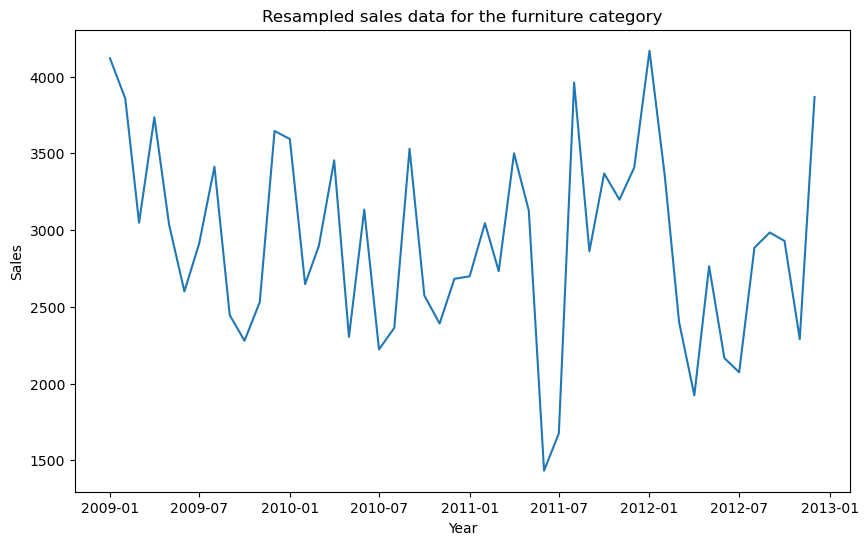

In [120]:
#visualize trend,seasonality and noise
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Resampled sales data for the furniture category')
plt.show()

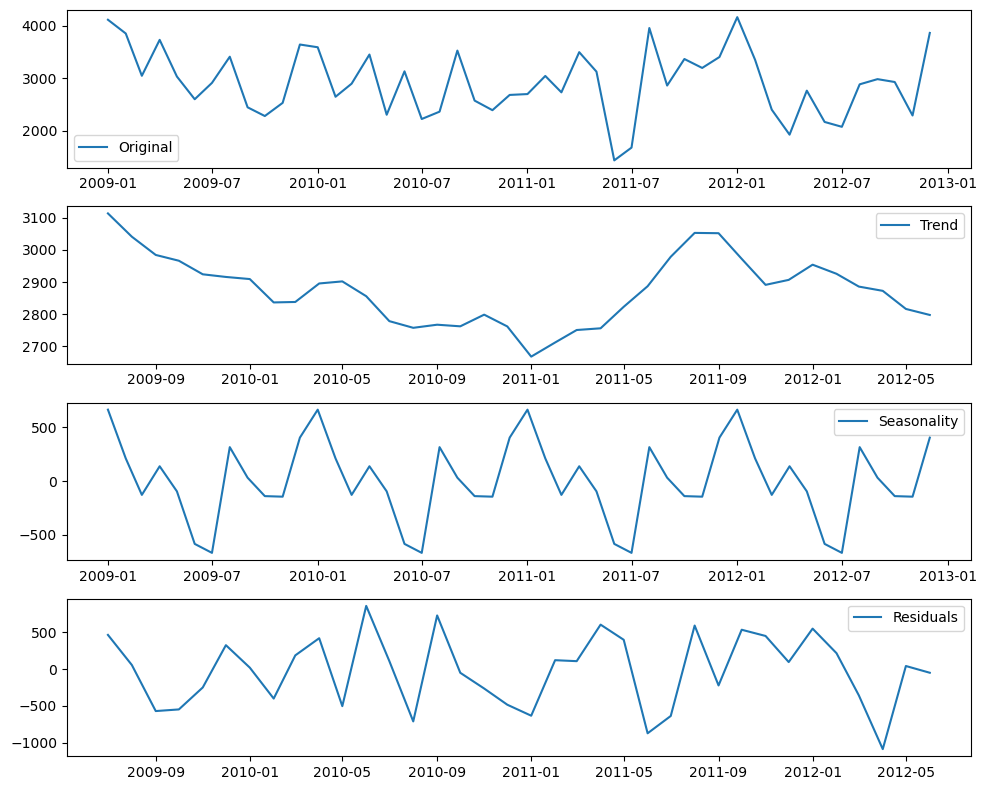

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming y is the resampled sales data as calculated earlier
decomposition = seasonal_decompose(y, model='additive')

# Plot the original data, trend, seasonal and residual components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Original: This is the plot of the original resampled sales data. It shows the overall trend in the data, 
    as well as any seasonality and random noise.

Trend: This is the plot of the trend component of the time series data, as calculated by the seasonal decomposition 
    function. The trend component shows the overall long-term behavior of the data, and can help to identify any upward 
    or downward trends in the data.

Seasonality: This is the plot of the seasonal component of the time series data, as calculated by the seasonal 
    decomposition function. The seasonal component shows the repeating pattern in the data over a fixed time period, 
    such as daily, weekly, or monthly. By examining the seasonal component, we can identify any seasonal patterns in 
    the data.

Residuals: This is the plot of the residual component of the time series data, as calculated by the seasonal decomposition
    function. The residual component shows the random fluctuations in the data that cannot be explained by the trend or 
    the seasonal component. By examining the residual component, we can identify any unusual or unexpected fluctuations 
    in the data.

ARIMA model requires the data to be stationary. We will perform a stationarity check on the sales data using the 
Augmented Dickey-Fuller (ADF) test. 

We will also plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to determine the 
order of differencing, and AR and MA terms for our ARIMA model.

ADF Statistic: -5.614024
p-value: 0.000001
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


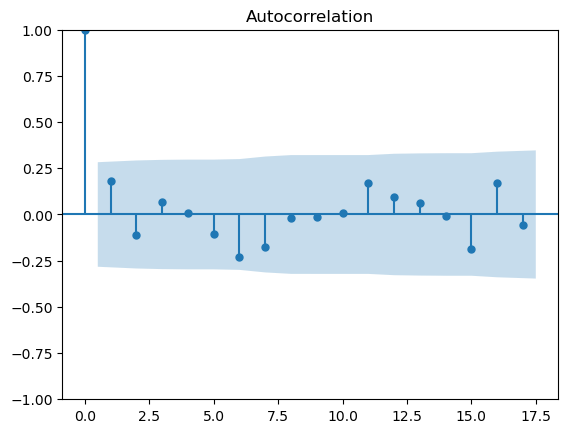

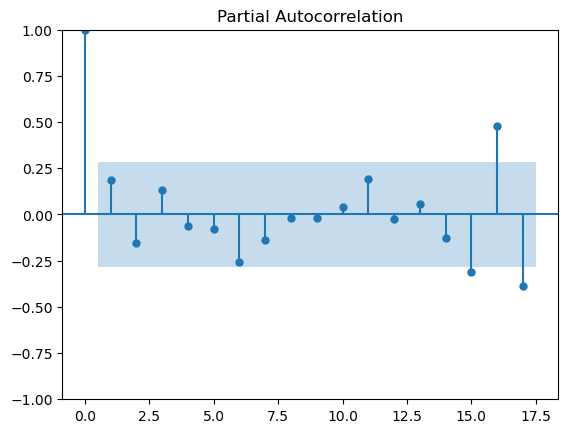

In [122]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(y)
plt.show()

plot_pacf(y)
plt.show()

In [123]:
#split train and test data
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]
print(train.shape,test.shape)

(38,) (10,)


**ARIMA**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -369.234
Date:                Mon, 01 May 2023   AIC                            744.468
Time:                        18:59:19   BIC                            750.019
Sample:                    01-01-2009   HQIC                           746.557
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2031      0.142      1.433      0.152      -0.075       0.481
ma.L1         -0.9998      0.235     -4.261      0.000      -1.460      -0.540
sigma2      3.737e+05    6.3e-07   5.94e+11      0.0

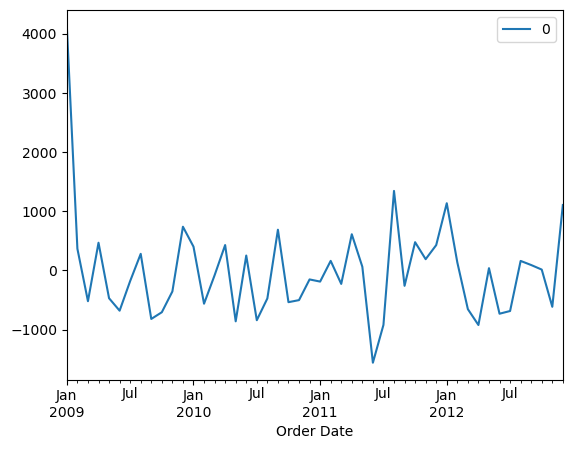

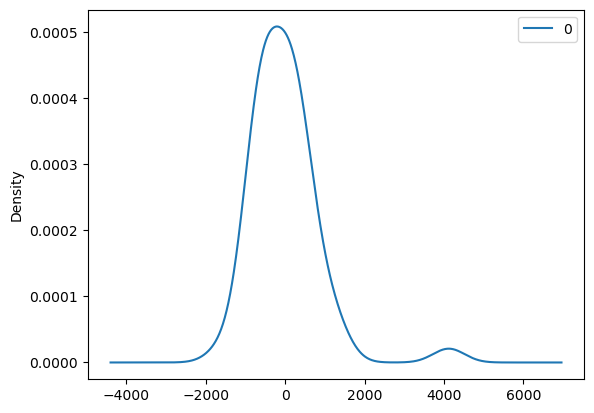

                 0
count    48.000000
mean    -17.044314
std     862.831498
min   -1560.329850
25%    -575.730683
50%    -117.305321
75%     375.073156
max    4119.453837


In [124]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

# summary of model
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residual errors
residuals.plot(kind='kde')
plt.show()

# summary stats of residual errors
print(residuals.describe())

In [125]:
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

MSE: 414094.934
RMSE: 643.502


In [126]:
# Make predictions for the next 48 months
forecast = model_fit.forecast(steps=48)

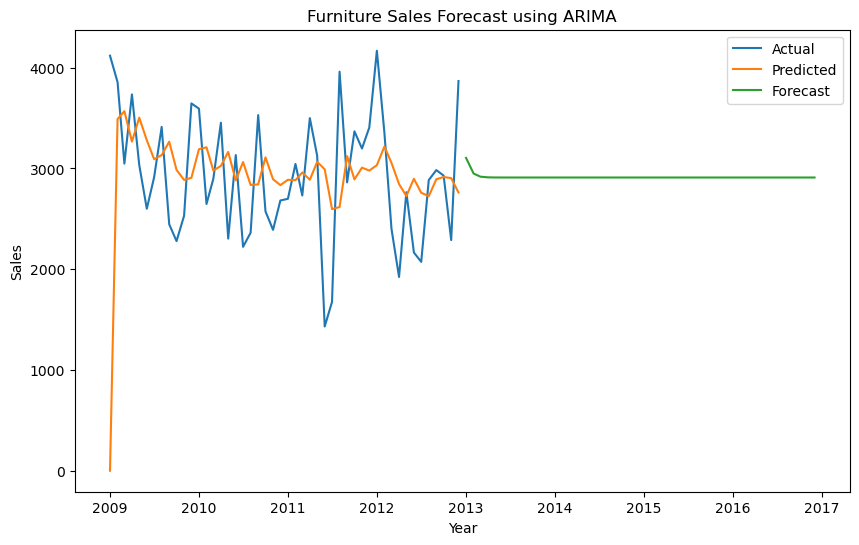

In [127]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Furniture Sales Forecast using ARIMA')
plt.legend()
plt.show()

**SARIMA**

In [128]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [129]:
df2 = df.loc[df['Product Category'] == 'Furniture']
df2['Order Date'] = pd.to_datetime(df2['Order Date']) #for easy manipulation
df2 = df2.set_index('Order Date')

# Resample the data to monthly frequency
y = df2['Sales'].resample('MS').mean()

# Split the data into training and testing sets
train = y[:len(y)-18]
test = y[len(y)-18:]
print(train.shape,test.shape)

(30,) (18,)


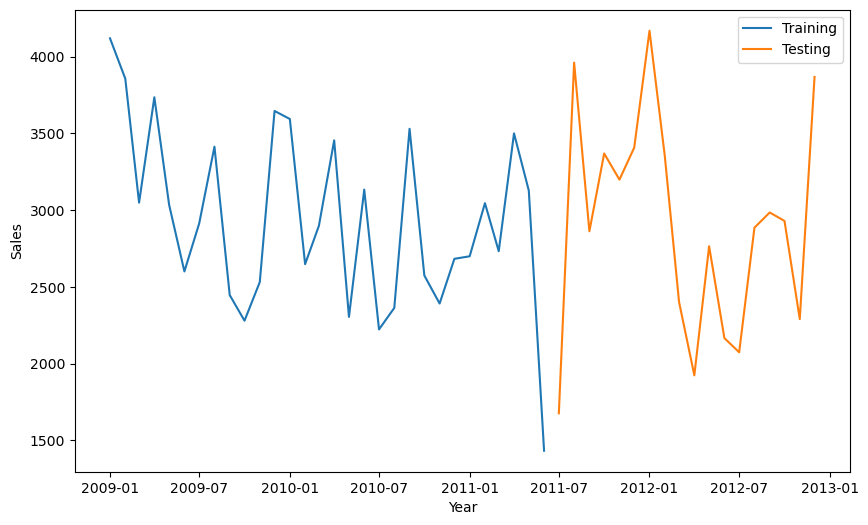

In [130]:
# Plot the training and testing data
plt.figure(figsize=(10,6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

ADF Statistic: -4.299087
p-value: 0.000446
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625
ADF Statistic: -2.664908
p-value: 0.080310
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


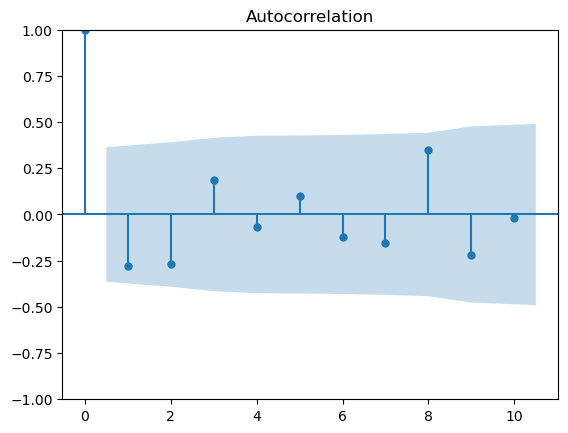

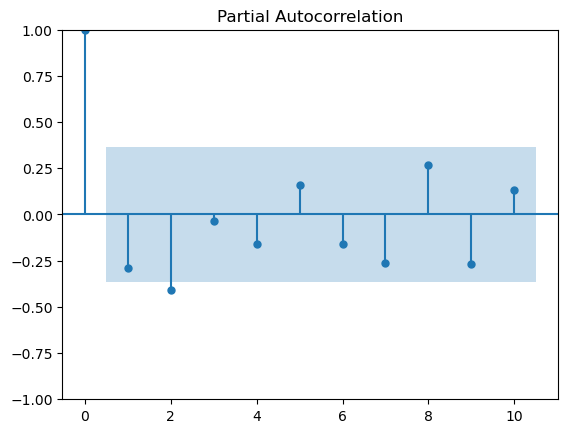

In [131]:
# Check for stationarity
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# First differencing
train_diff = train.diff().dropna()

# Check for stationarity after first differencing
result = adfuller(train_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot ACF and PACF after first differencing
plot_acf(train_diff, lags=10)
plt.show()
plot_pacf(train_diff, lags=10)
plt.show()

In [132]:
# Fit a Seasonal ARIMA (SARIMA) model to the data
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.832
Date:                            Mon, 01 May 2023   AIC                            279.663
Time:                                    18:59:20   BIC                            283.829
Sample:                                01-01-2009   HQIC                           280.077
                                     - 06-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1233      0.431     -0.286      0.775      -0.967       0.721
ma.L1         -0.9991    105.834   

In [133]:
# Predict the sales for the test set
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

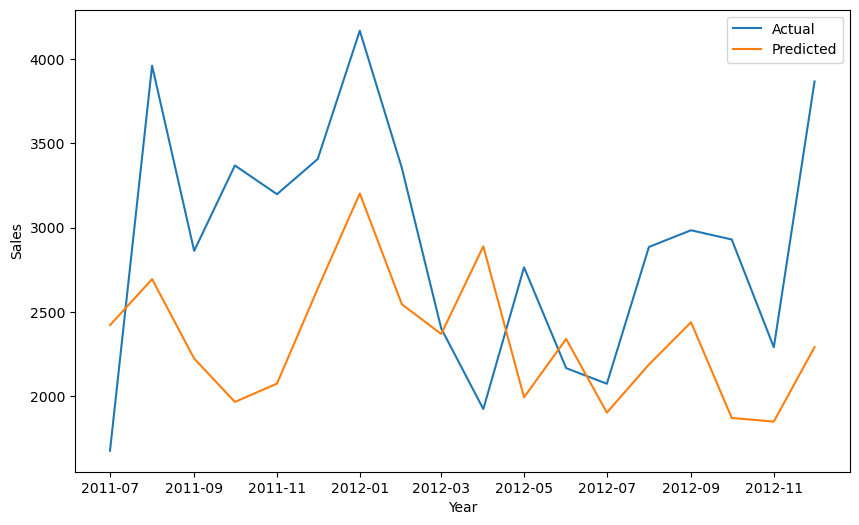

In [134]:
# Plot the actual and predicted sales for the test set
plt.figure(figsize=(10,6))
plt.plot(test, label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [135]:
# Forecast the sales for the next 48 months
forecast = model_fit.forecast(48)

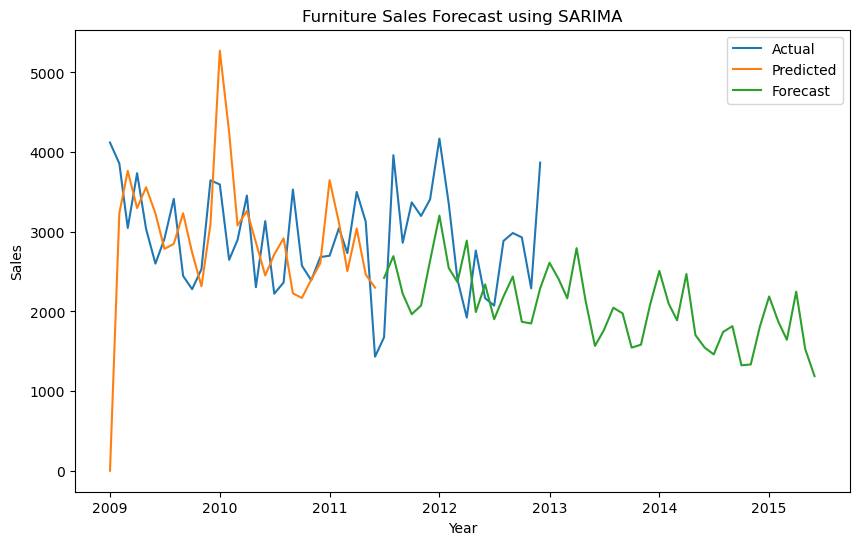

In [136]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Furniture Sales Forecast using SARIMA')
plt.legend()
plt.show()

In [137]:
# Calculate the root mean squared error (RMSE) for the test set predictions
rmse = np.sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 887.058


**Exponential Smoothing**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [139]:
df3 = df.loc[df['Product Category'] == 'Furniture']
display(df3.sort_values('Order Date'))
df3['Order Date'] = pd.to_datetime(df3['Order Date']) #for easy manipulation
df3 = df3.set_index('Order Date')

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
7001,2009-01-02,Low,43,4083.19,0.07,Delivery Truck,-1049.85,100.98,45.00,Alan Schoenberger,...,Furniture,Chairs & Chairmats,Hon Valutask™ Swivel Chairs,Jumbo Drum,0.69,2009-01-04,1,2009,2,-13147.197977
7000,2009-01-02,Low,4,1239.06,0.00,Delivery Truck,-193.08,291.73,48.80,Alan Schoenberger,...,Furniture,Chairs & Chairmats,Hon 4070 Series Pagoda™ Armless Upholstered St...,Jumbo Drum,0.56,2009-01-02,1,2009,2,-8804.438399
7957,2009-01-03,High,12,262.76,0.05,Regular Air,-146.05,20.98,21.20,Larry Tron,...,Furniture,Office Furnishings,36X48 HARDFLOOR CHAIRMAT,Medium Box,0.78,2009-01-04,1,2009,3,-7302.956180
4657,2009-01-03,High,4,698.00,0.09,Delivery Truck,-93.16,212.60,52.20,Patrick Jones,...,Furniture,Tables,Bush Advantage Collection® Round Conference Table,Jumbo Box,0.64,2009-01-04,1,2009,3,-4493.849240
2423,2009-01-04,High,3,1039.56,0.06,Delivery Truck,-394.69,350.98,30.00,Dave Hallsten,...,Furniture,Chairs & Chairmats,Office Star - Professional Matrix Back Chair w...,Jumbo Drum,0.61,2009-01-05,1,2009,4,-11113.119474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2012-12-25,Medium,36,4852.05,0.00,Delivery Truck,-1197.58,122.99,70.20,Giulietta Weimer,...,Furniture,Chairs & Chairmats,"Global High-Back Leather Tilter, Burgundy",Jumbo Drum,0.74,2012-12-28,12,2012,25,-13329.580083
2524,2012-12-27,High,13,759.94,0.09,Delivery Truck,-226.45,60.89,32.41,Lena Radford,...,Furniture,Chairs & Chairmats,"Global Push Button Manager's Chair, Indigo",Jumbo Drum,0.56,2012-12-29,12,2012,27,-9460.557962
5675,2012-12-29,Critical,17,3711.04,0.04,Delivery Truck,-773.78,218.75,69.64,Jennifer Jackson,...,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,Jumbo Box,0.77,2012-12-30,12,2012,29,-12653.638846
6342,2012-12-30,Not Specified,45,580.96,0.08,Regular Air,-33.47,13.73,6.85,Jim Epp,...,Furniture,Office Furnishings,DAX Wood Document Frame.,Wrap Bag,0.54,2012-12-30,12,2012,30,891.053363


In [140]:
df3=df3['Sales']
df3=pd.DataFrame(df3)

In [141]:
train_data = df3[:-48]
test_data = df3[-48:]
print(train_data.shape,test_data.shape)

(1634, 1) (48, 1)


In [142]:
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

In [143]:
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                 1634
Model:             ExponentialSmoothing   SSE                    23499780301.892
Optimized:                         True   AIC                          27668.723
Trend:                         Additive   BIC                          29660.875
Seasonal:                      Additive   AICC                         27887.443
Seasonal Periods:                   365   Date:                 Mon, 01 May 2023
Box-Cox:                          False   Time:                         18:59:20
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.0403564                alpha                 True
smoothing_trend       

In [144]:
predictions = model_fit.forecast(48) #predict sales for next 48months

In [145]:
future_index = pd.date_range('2013-01-01', periods=48, freq='M')

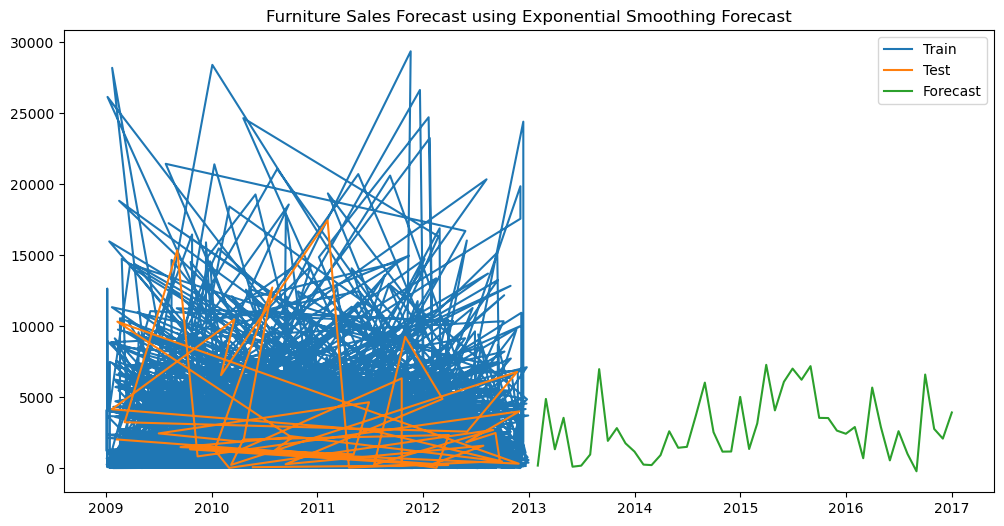

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(future_index, predictions.values, label='Forecast')
plt.legend(loc='best')
plt.title('Furniture Sales Forecast using Exponential Smoothing Forecast')
plt.show()

In [147]:
# calculate metrics
mse = mean_squared_error(test_data['Sales'].iloc[-48:], predictions)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4280.24


**Forecasting sales for Office Supplies**

In [148]:
df1 = df.loc[df['Product Category'] == 'Office Supplies']
df1

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
0,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre,...,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010,13,-9223.021619
1,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.8100,208.16,68.02,Barry French,...,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012,1,21056.415033
2,2012-10-01,High,27,244.57,0.01,Regular Air,46.7075,8.69,2.99,Barry French,...,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012,1,12708.229234
4,2010-08-28,Not Specified,19,394.27,0.08,Regular Air,30.9400,21.78,5.94,Carlos Soltero,...,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010,28,11299.329077
6,2011-06-17,High,12,93.54,0.03,Regular Air,-54.0385,7.30,7.72,Carl Jackson,...,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,2011-06-17,6,2011,17,-1336.484447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,2010-11-07,Medium,23,82.12,0.07,Regular Air,-121.5895,3.52,6.83,Harry Greene,...,Office Supplies,Binders and Binder Accessories,Self-Adhesive Ring Binder Labels,Small Box,0.38,2010-11-09,11,2010,7,-6261.069817
8323,2010-05-15,Medium,8,22.85,0.07,Regular Air,0.8800,2.88,0.99,Frank Hawley,...,Office Supplies,Labels,Avery 474,Small Box,0.36,2010-05-15,5,2010,15,7089.557176
8326,2012-09-12,Not Specified,43,322.47,0.09,Express Air,72.2800,7.78,2.50,Grant Donatelli,...,Office Supplies,Envelopes,Staples #10 Colored Envelopes,Small Box,0.38,2012-09-14,9,2012,12,14237.783480
8329,2012-07-09,Low,34,1041.66,0.02,Express Air,480.5305,28.53,1.49,Harry Greene,...,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',Small Box,0.38,2012-07-16,7,2012,9,21215.321437


In [149]:
df1['Order Date'] = pd.to_datetime(df1['Order Date']) #for easy manipulation
df1 = df1.set_index('Order Date')  #setting date as index so that we can easily resample the data at monthly level
y = df1['Sales'].resample('MS').mean()

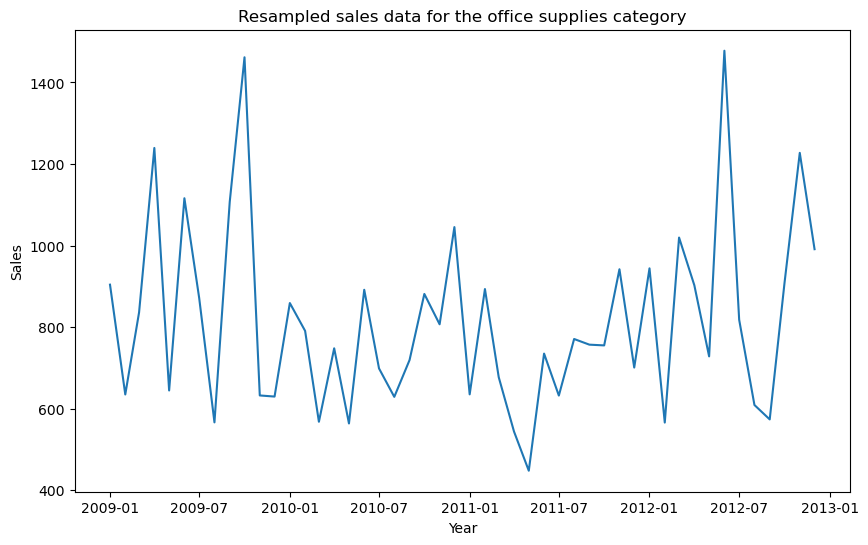

In [150]:
#visualize trend,seasonality and noise
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Resampled sales data for the office supplies category')
plt.show()

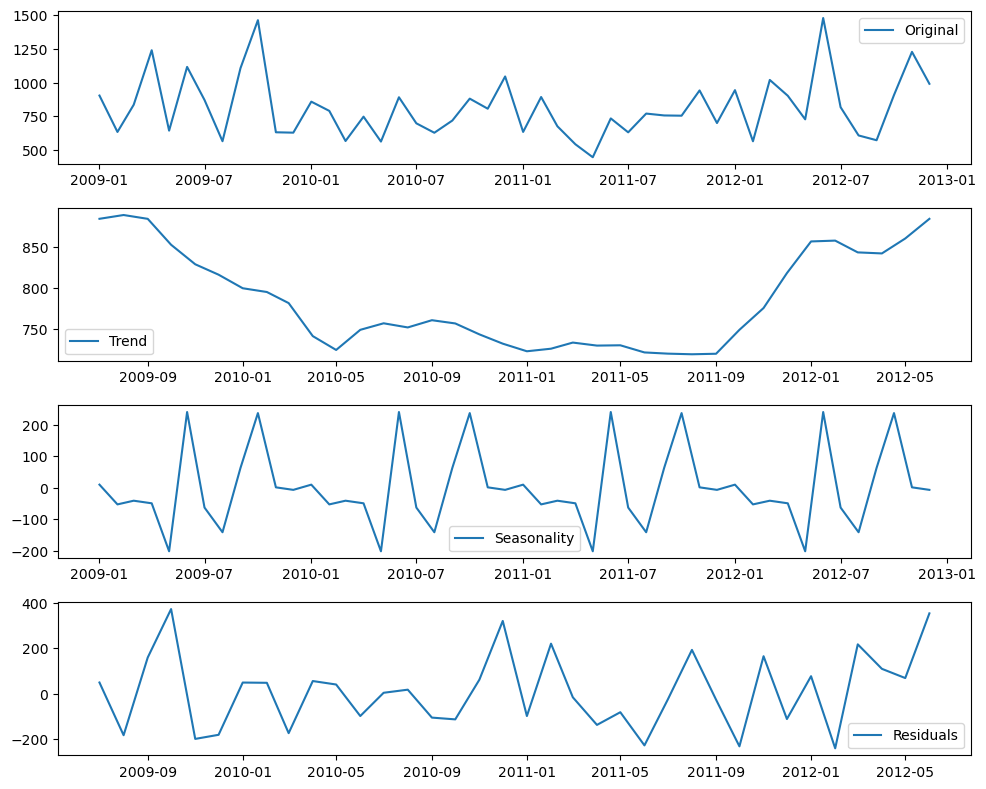

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming y is the resampled sales data as calculated earlier
decomposition = seasonal_decompose(y, model='additive')

# Plot the original data, trend, seasonal and residual components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ADF Statistic: -6.583322
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


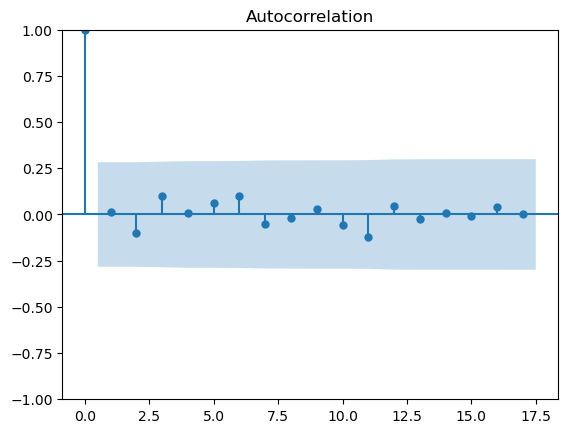

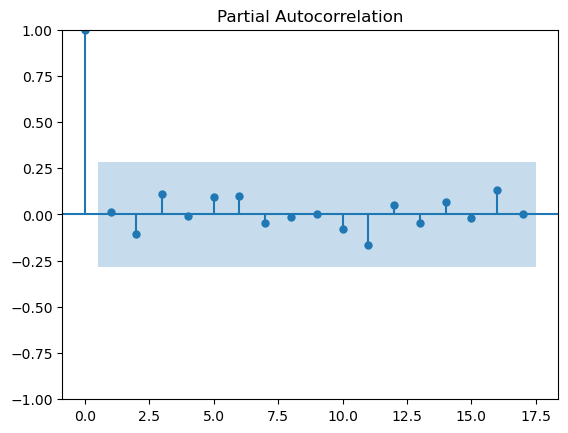

In [152]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(y)
plt.show()

plot_pacf(y)
plt.show()

In [153]:
rain_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]
print(train.shape,test.shape)

(38,) (10,)


**ARIMA**

In [154]:
# To choose the best order parameters p,d,q
import itertools
import warnings
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (assuming there is no seasonality)
seasonal_pdq = [(0, 0, 0, 0)]

# Initialize variables to keep track of optimal parameters and lowest AIC score
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

# Suppress ARIMA convergence warnings
warnings.filterwarnings('ignore')

# Loop through all combinations of p, d, q and seasonal p, d, q parameters to find the optimal combination
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Fit ARIMA model with current parameters
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            # Update optimal parameters if current AIC score is lower than previous best
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                
            print(f'ARIMA{param}x{param_seasonal} - AIC: {results.aic:.2f}')
        except:
            continue

# Print the optimal parameters and AIC score
print(f'Best ARIMA{best_pdq}x{best_seasonal_pdq} - AIC: {best_aic:.2f}')


ARIMA(0, 0, 0)x(0, 0, 0, 0) - AIC: 768.77
ARIMA(0, 0, 1)x(0, 0, 0, 0) - AIC: 717.69
ARIMA(0, 0, 2)x(0, 0, 0, 0) - AIC: 689.15
ARIMA(0, 1, 0)x(0, 0, 0, 0) - AIC: 663.50
ARIMA(0, 1, 1)x(0, 0, 0, 0) - AIC: 625.18
ARIMA(0, 1, 2)x(0, 0, 0, 0) - AIC: 612.36
ARIMA(0, 2, 0)x(0, 0, 0, 0) - AIC: 697.52
ARIMA(0, 2, 1)x(0, 0, 0, 0) - AIC: 639.93
ARIMA(0, 2, 2)x(0, 0, 0, 0) - AIC: 603.63
ARIMA(1, 0, 0)x(0, 0, 0, 0) - AIC: 677.97
ARIMA(1, 0, 1)x(0, 0, 0, 0) - AIC: 641.57
ARIMA(1, 0, 2)x(0, 0, 0, 0) - AIC: 629.39
ARIMA(1, 1, 0)x(0, 0, 0, 0) - AIC: 654.84
ARIMA(1, 1, 1)x(0, 0, 0, 0) - AIC: 627.15
ARIMA(1, 1, 2)x(0, 0, 0, 0) - AIC: 611.37
ARIMA(1, 2, 0)x(0, 0, 0, 0) - AIC: 679.42
ARIMA(1, 2, 1)x(0, 0, 0, 0) - AIC: 631.90
ARIMA(1, 2, 2)x(0, 0, 0, 0) - AIC: 602.68
ARIMA(2, 0, 0)x(0, 0, 0, 0) - AIC: 656.56
ARIMA(2, 0, 1)x(0, 0, 0, 0) - AIC: 642.86
ARIMA(2, 0, 2)x(0, 0, 0, 0) - AIC: 630.59
ARIMA(2, 1, 0)x(0, 0, 0, 0) - AIC: 633.51
ARIMA(2, 1, 1)x(0, 0, 0, 0) - AIC: 628.17
ARIMA(2, 1, 2)x(0, 0, 0, 0) - AIC:

The best ARIMA model according to the AIC score is ARIMA(1, 2, 2)x(0, 0, 0, 0). 
This means that the optimal values for the model parameters are p=1, d=2, and q=2. The (0, 0, 0, 0) part of the model 
represents the seasonal component, which in this case is not present.
So the final ARIMA model would be ARIMA(1, 2, 2).

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -320.159
Date:                Mon, 01 May 2023   AIC                            648.318
Time:                        18:59:23   BIC                            655.633
Sample:                    01-01-2009   HQIC                           651.058
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0293      0.175      0.167      0.867      -0.314       0.373
ma.L1         -1.9703      0.234     -8.405      0.000      -2.430      -1.511
ma.L2          0.9979      0.232      4.306      0.0

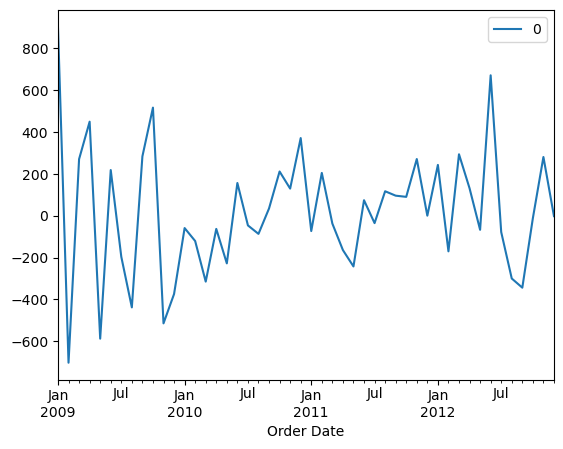

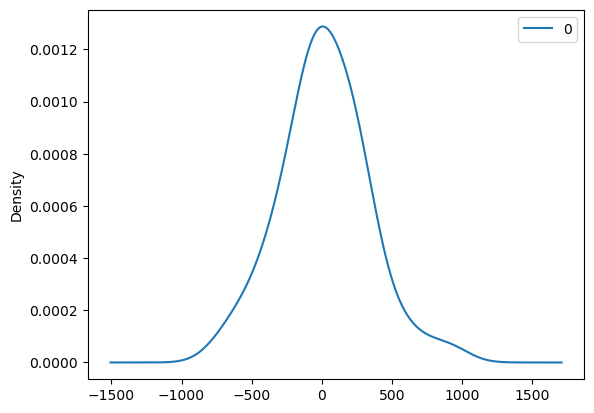

                0
count   48.000000
mean    16.318518
std    310.901590
min   -702.236960
25%   -165.245214
50%     -6.444215
75%    213.638847
max    903.992623


In [155]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model
model = ARIMA(y, order=(1,2,2))
model_fit = model.fit()

# summary of model
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residual errors
residuals.plot(kind='kde')
plt.show()

# summary stats of residual errors
print(residuals.describe())

In [156]:
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print('MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)

MSE: 115124.807
Test RMSE: 339.300


In [157]:
# Make predictions for the next 48 months
forecast = model_fit.forecast(steps=48)

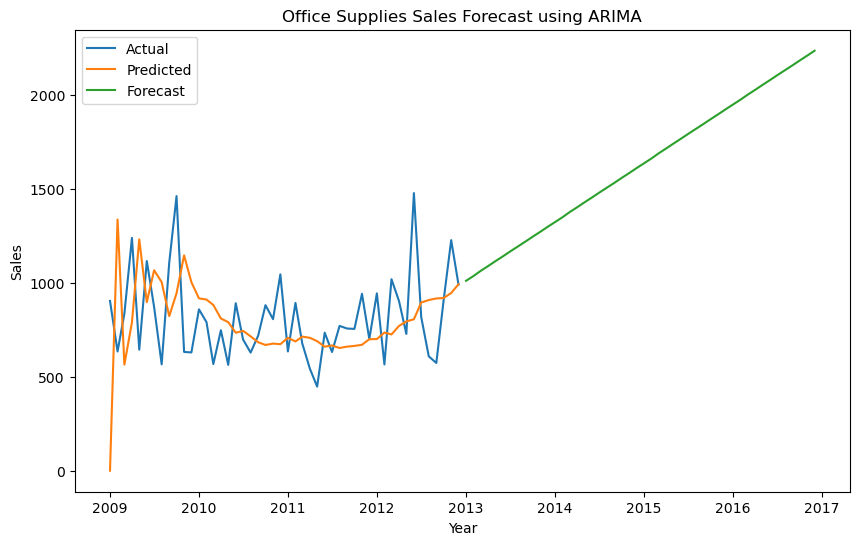

In [158]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Office Supplies Sales Forecast using ARIMA')
plt.legend()
plt.show()

**SARIMA**

In [159]:
df2 = df.loc[df['Product Category'] == 'Office Supplies']
df2['Order Date'] = pd.to_datetime(df2['Order Date']) #for easy manipulation
df2 = df2.set_index('Order Date')

# Resample the data to monthly frequency
y = df2['Sales'].resample('MS').mean()

# Split the data into training and testing sets
train = y[:len(y)-18]
test = y[len(y)-18:]
print(train.shape,test.shape)

(30,) (18,)


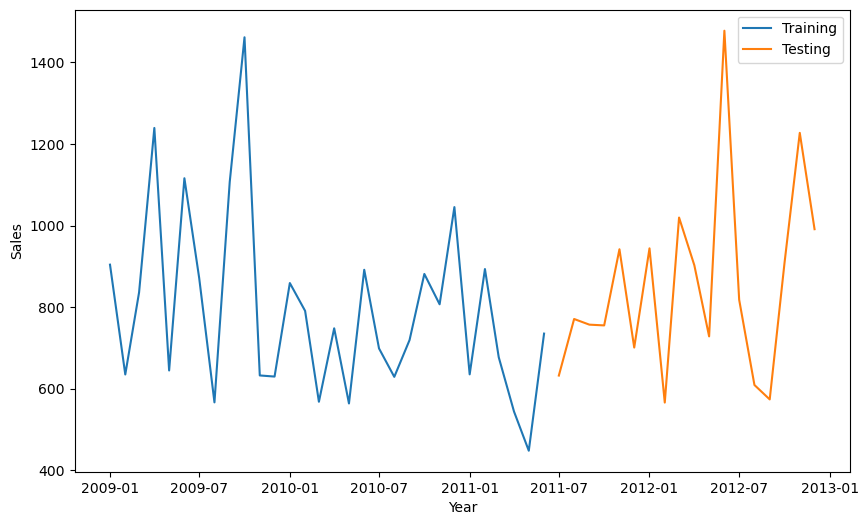

In [160]:
# Plot the training and testing data
plt.figure(figsize=(10,6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

ADF Statistic: -5.151608
p-value: 0.000011
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
ADF Statistic: -5.547407
p-value: 0.000002
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


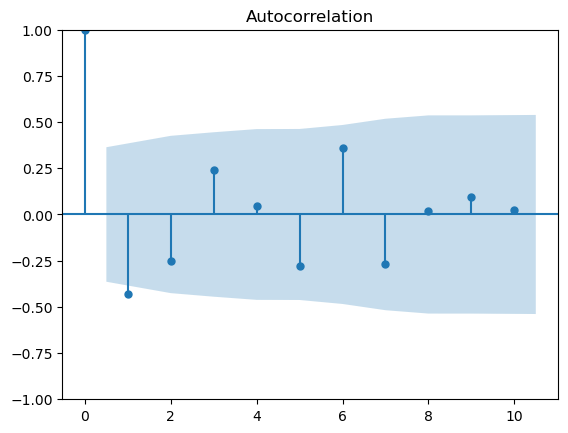

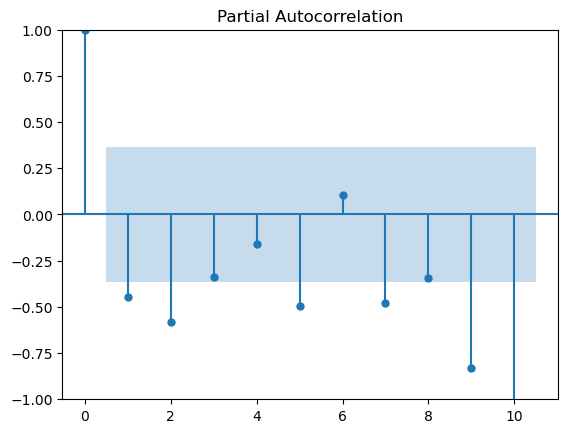

In [161]:
# Check for stationarity
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# First differencing
train_diff = train.diff().dropna()

# Check for stationarity after first differencing
result = adfuller(train_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot ACF and PACF after first differencing
plot_acf(train_diff, lags=10)
plt.show()
plot_pacf(train_diff, lags=10)
plt.show()

In [162]:
# Fit a Seasonal ARIMA (SARIMA) model to the data
model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -122.948
Date:                            Mon, 01 May 2023   AIC                            255.896
Time:                                    18:59:24   BIC                            260.348
Sample:                                01-01-2009   HQIC                           256.510
                                     - 06-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2941      0.384     -0.766      0.444      -1.047       0.459
ma.L1          0.9994     89.205   

In [163]:
# Predict the sales for the test set
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

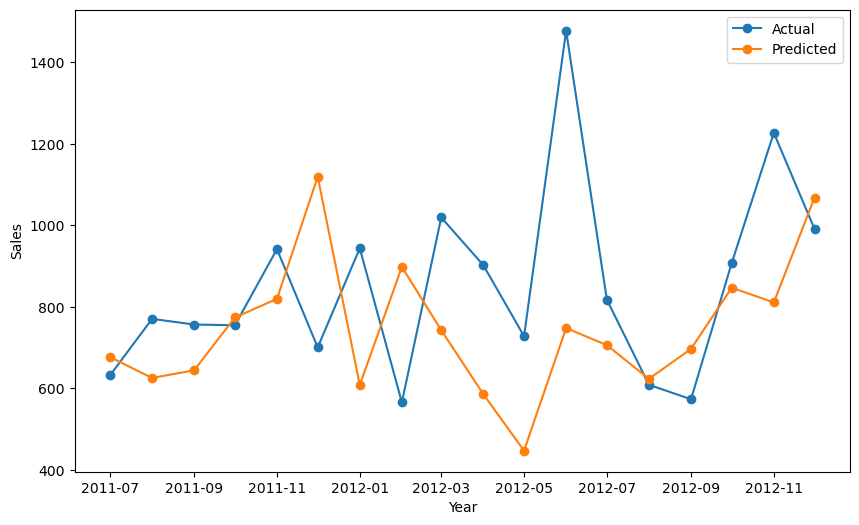

In [164]:
# Plot the actual and predicted sales for the test set
plt.figure(figsize=(10,6))
plt.plot(test, label='Actual',marker='o')
plt.plot(pred, label='Predicted',marker='o')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [165]:
# Forecast the sales for the next 48 months
forecast = model_fit.forecast(48)

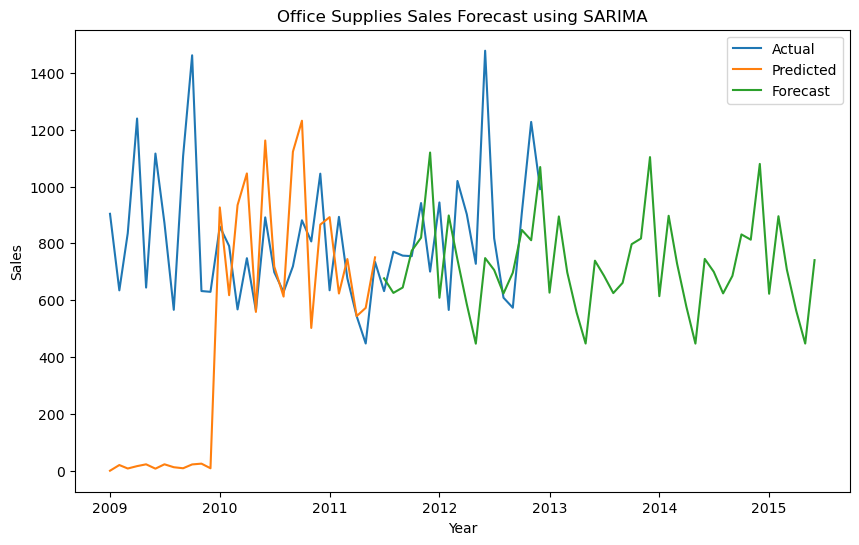

In [166]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Office Supplies Sales Forecast using SARIMA')
plt.legend()
plt.show()

In [167]:
# Calculate the root mean squared error (RMSE) for the test set predictions
rmse = np.sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 283.674


**Exponential Smoothing**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [169]:
df3 = df.loc[df['Product Category'] == 'Office Supplies']
display(df3.sort_values('Order Date'))
df3['Order Date'] = pd.to_datetime(df3['Order Date']) #for easy manipulation
df3 = df3.set_index('Order Date')

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
4343,2009-01-01,High,32,180.36,0.10,Regular Air,-111.8000,5.98,4.69,Jessica Myrick,...,Office Supplies,Storage & Organization,"Perma STOR-ALL™ Hanging File Box, 13 1/8""W x 1...",Small Box,0.68,2009-01-02,1,2009,1,-5647.749695
7093,2009-01-02,Critical,16,137.63,0.09,Express Air,26.7100,9.11,2.15,Elizabeth Moffitt,...,Office Supplies,Paper,"Black Print Carbonless Snap-Off® Rapid Letter,...",Wrap Bag,0.40,2009-01-04,1,2009,2,10847.832879
7094,2009-01-02,Critical,43,614.80,0.08,Regular Air,247.7900,15.04,1.97,Elizabeth Moffitt,...,Office Supplies,Paper,White GlueTop Scratch Pads,Wrap Bag,0.39,2009-01-02,1,2009,2,18612.878342
7002,2009-01-02,Low,32,4902.38,0.05,Regular Air,1438.4900,155.06,7.07,Alan Schoenberger,...,Office Supplies,Storage & Organization,"Dual Level, Single-Width Filing Carts",Small Box,0.59,2009-01-09,1,2009,2,25067.245503
1347,2009-01-02,Critical,3,124.81,0.06,Regular Air,-11.9370,40.98,2.99,David Philippe,...,Office Supplies,Binders and Binder Accessories,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",Small Box,0.36,2009-01-04,1,2009,2,4221.177245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,2012-12-29,Medium,36,12690.33,0.08,Express Air,5045.3025,367.99,19.99,Logan Haushalter,...,Office Supplies,Binders and Binder Accessories,Ibico Ibimaster 300 Manual Binding System,Small Box,0.40,2012-12-29,12,2012,29,26760.196247
2195,2012-12-30,Low,37,257.46,0.09,Express Air,-18.6600,7.28,4.23,Matt Hagelstein,...,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",Wrap Bag,0.39,2012-12-30,12,2012,30,3040.107814
7177,2012-12-30,Not Specified,35,448.10,0.10,Express Air,-15.0700,13.48,4.51,Tony Molinari,...,Office Supplies,Storage & Organization,Tenex Personal Project File with Scoop Front D...,Small Box,0.59,2012-12-30,12,2012,30,3650.149917
5171,2012-12-30,Medium,10,14.15,0.10,Regular Air,-1.2900,1.48,0.70,Theresa Swint,...,Office Supplies,Rubber Bands,Binder Clips by OIC,Wrap Bag,0.37,2012-12-30,12,2012,30,6640.221473


In [170]:
df3=df3['Sales']
df3=pd.DataFrame(df3)

In [171]:
train_data = df3[:-48]
test_data = df3[-48:]
print(train_data.shape,test_data.shape)

(4541, 1) (48, 1)


In [172]:
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

In [173]:
predictions = model_fit.forecast(48) #predict sales for next 48months

In [174]:
future_index = pd.date_range('2013-01-01', periods=48, freq='M')

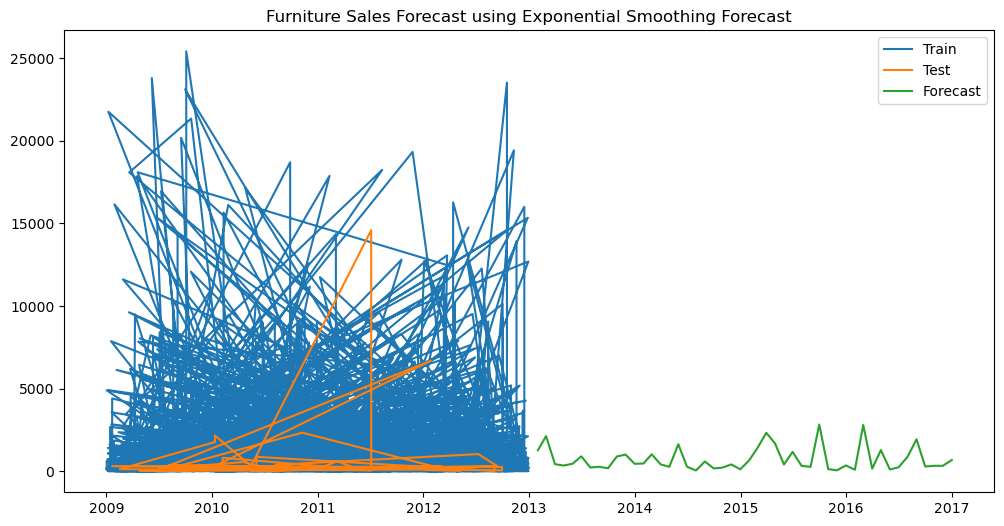

In [175]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Train')
plt.plot(test_data.index, test_data.values, label='Test')
plt.plot(future_index, predictions.values, label='Forecast')
plt.legend(loc='best')
plt.title('Furniture Sales Forecast using Exponential Smoothing Forecast')
plt.show()

In [176]:
# calculate metrics
mse = mean_squared_error(test_data['Sales'].iloc[-48:], predictions)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 2411.32


**Forecasting sales for Technology**

In [177]:
#Forecasting sales for furniture
df1 = df.loc[df['Product Category'] == 'Technology']
df1

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.971,195.99,3.99,Clay Rozendal,...,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011,10,24538.572086
11,2012-06-08,Not Specified,31,1474.3300,0.04,Regular Air,114.460,47.98,3.61,Carlos Daly,...,Technology,Computer Peripherals,"DS/HD IBM Formatted Diskettes, 200/Pack - Staples",Small Pack,0.71,2012-06-10,6,2012,8,15821.506660
17,2012-04-15,Low,15,834.9040,0.06,Regular Air,-11.682,65.99,5.26,Jim Radford,...,Technology,Telephones and Communication,g520,Small Box,0.59,2012-04-22,4,2012,15,4269.257590
18,2012-04-15,Low,18,2480.9205,0.01,Regular Air,313.578,155.99,8.99,Jim Radford,...,Technology,Telephones and Communication,LX 788,Small Box,0.58,2012-04-19,4,2012,15,19545.112196
22,2011-03-09,Low,38,184.9900,0.05,Regular Air,-144.550,4.89,4.93,Carl Ludwig,...,Technology,Computer Peripherals,"Maxell 3.5"" DS/HD IBM-Formatted Diskettes, 10/...",Small Pack,0.66,2011-03-14,3,2011,9,-7245.471474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,2011-05-06,Low,47,5126.4180,0.03,Regular Air,1557.639,125.99,2.50,Jason Fortune,...,Technology,Telephones and Communication,i2000,Small Box,0.60,2011-05-15,5,2011,6,25234.583216
8324,2010-05-15,Medium,16,12007.0500,0.09,Delivery Truck,2713.950,808.49,55.30,Frank Hawley,...,Technology,Office Machines,"Hewlett-Packard Business Color Inkjet 3000 [N,...",Jumbo Drum,0.40,2010-05-17,5,2010,15,26191.379001
8325,2011-04-17,Not Specified,31,5347.9875,0.01,Regular Air,1332.441,200.99,4.20,Jason Fortune,...,Technology,Telephones and Communication,2160i,Small Box,0.59,2011-04-20,4,2011,17,24843.893236
8330,2011-07-30,High,41,10071.0900,0.10,Delivery Truck,1977.690,264.98,17.86,Harry Greene,...,Technology,Office Machines,Panasonic KX-P1131 Dot Matrix Printer,Jumbo Drum,0.58,2011-07-31,7,2011,30,25746.465245


In [178]:
df1['Order Date'] = pd.to_datetime(df1['Order Date']) #for easy manipulation
df1 = df1.set_index('Order Date')  #setting date as index so that we can easily resample the data at monthly level
y = df1['Sales'].resample('MS').mean() 

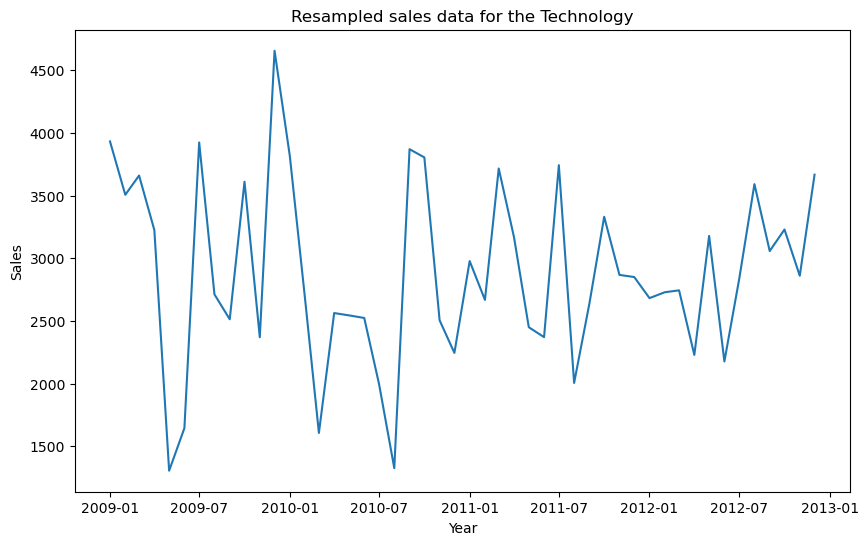

In [179]:
#visualize trend,seasonality and noise
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Resampled sales data for the Technology')
plt.show()

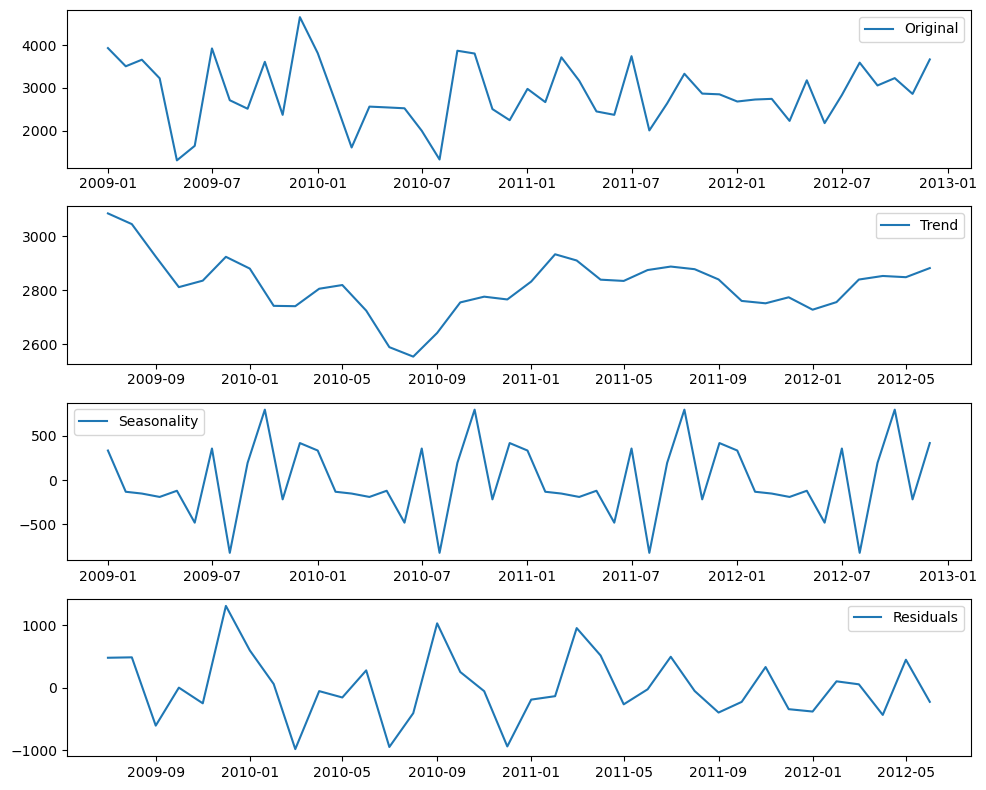

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming y is the resampled sales data as calculated earlier
decomposition = seasonal_decompose(y, model='additive')

# Plot the original data, trend, seasonal and residual components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ADF Statistic: -4.418808
p-value: 0.000275
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


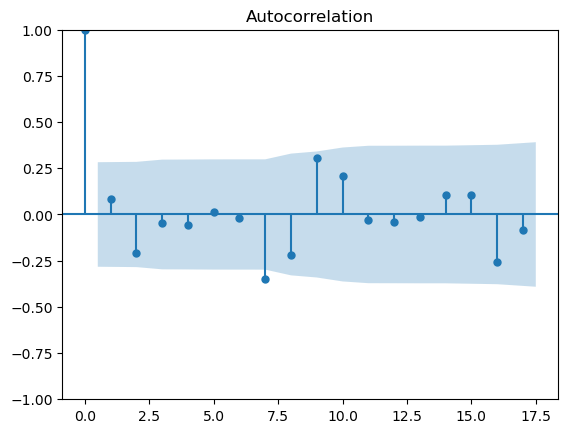

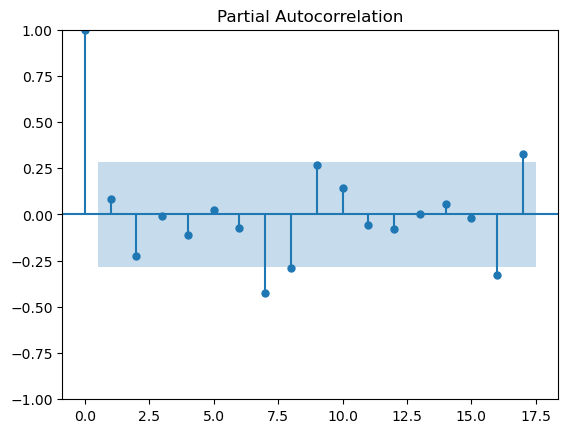

In [181]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(y)
plt.show()

plot_pacf(y)
plt.show()

In [182]:
#split train and test data
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]
print(train.shape,test.shape)

(38,) (10,)


**ARIMA**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -377.318
Date:                Mon, 01 May 2023   AIC                            760.635
Time:                        18:59:26   BIC                            766.186
Sample:                    01-01-2009   HQIC                           762.724
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0966      0.131      0.739      0.460      -0.160       0.353
ma.L1         -0.9999      0.195     -5.128      0.000      -1.382      -0.618
sigma2       5.16e+05   3.78e-07   1.37e+12      0.0

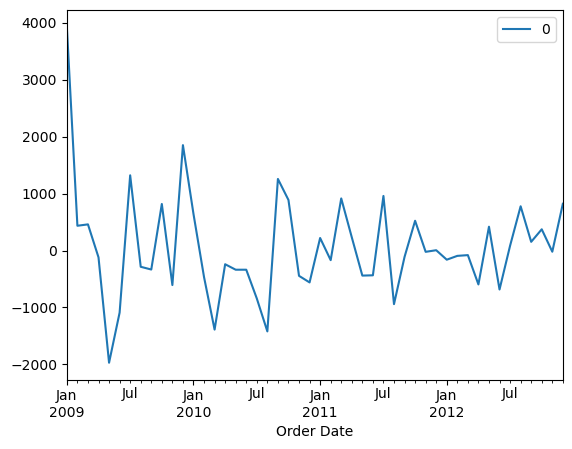

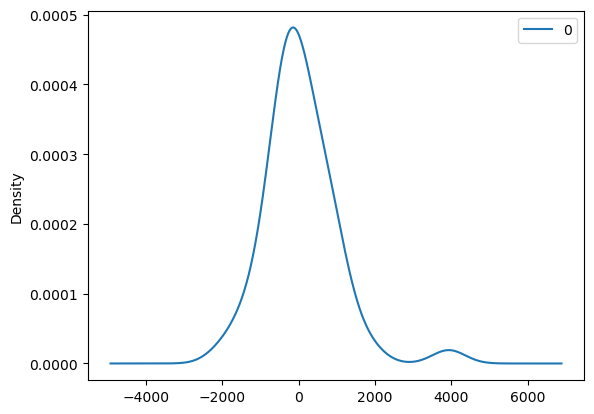

                 0
count    48.000000
mean     60.222580
std     940.644027
min   -1971.256318
25%    -441.385384
50%     -87.099907
75%     475.601834
max    3932.715030


In [183]:
from statsmodels.tsa.arima.model import ARIMA

# fit ARIMA model
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

# summary of model
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residual errors
residuals.plot(kind='kde')
plt.show()

# summary stats of residual errors
print(residuals.describe())

In [184]:
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

MSE: 237286.796
RMSE: 487.121


In [185]:
# Make predictions for the next 48 months
forecast = model_fit.forecast(steps=48)

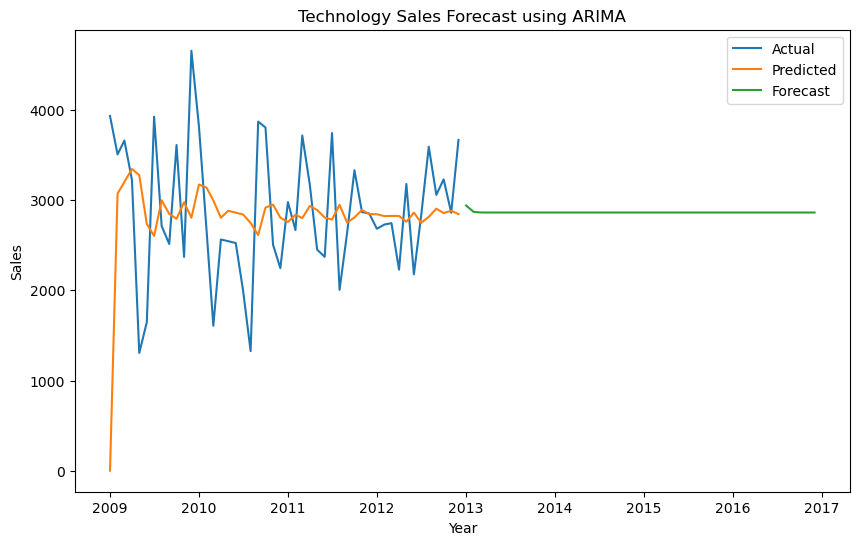

In [186]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Technology Sales Forecast using ARIMA')
plt.legend()
plt.show()

**SARIMA**

In [187]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [188]:
df2 = df.loc[df['Product Category'] == 'Technology']
df2['Order Date'] = pd.to_datetime(df2['Order Date']) #for easy manipulation
df2 = df2.set_index('Order Date')

# Resample the data to monthly frequency
y = df2['Sales'].resample('MS').mean()

# Split the data into training and testing sets
train = y[:len(y)-18]
test = y[len(y)-18:]
print(train.shape,test.shape)

(30,) (18,)


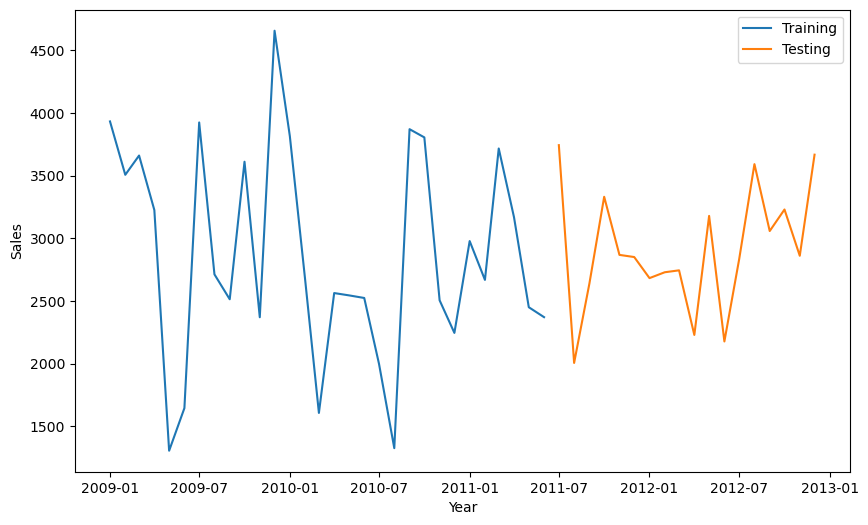

In [189]:
# Plot the training and testing data
plt.figure(figsize=(10,6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

ADF Statistic: -1.460643
p-value: 0.552883
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
ADF Statistic: -3.550215
p-value: 0.006787
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


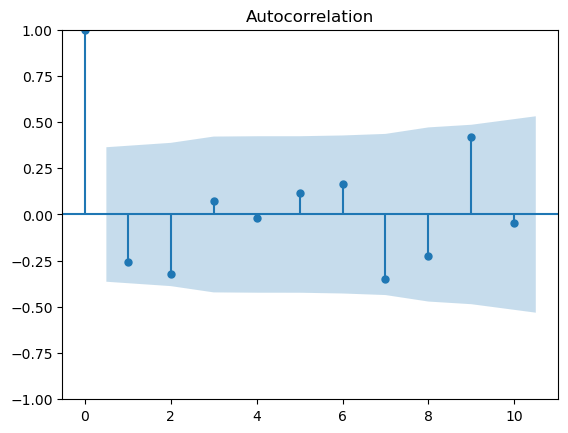

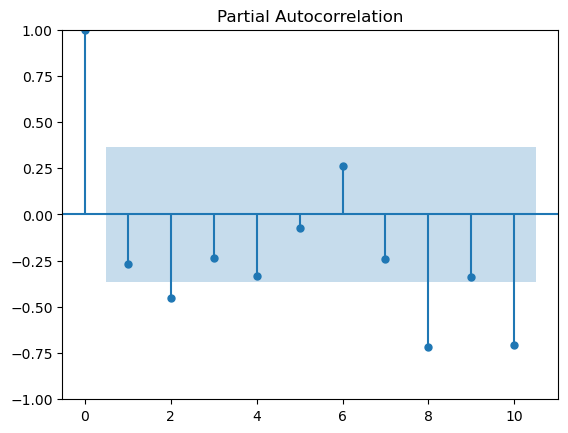

In [190]:
# Check for stationarity
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# First differencing
train_diff = train.diff().dropna()

# Check for stationarity after first differencing
result = adfuller(train_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Plot ACF and PACF after first differencing
plot_acf(train_diff, lags=10)
plt.show()
plot_pacf(train_diff, lags=10)
plt.show()

In [191]:
# Fit a Seasonal ARIMA (SARIMA) model to the data
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,0,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   30
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -234.414
Date:                              Mon, 01 May 2023   AIC                            482.828
Time:                                      18:59:27   BIC                            492.399
Sample:                                  01-01-2009   HQIC                           485.825
                                       - 06-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6691      0.224     -2.982      0.003      -1.109      -0.229
ar.L2         -0.02

In [192]:
# Predict the sales for the test set
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

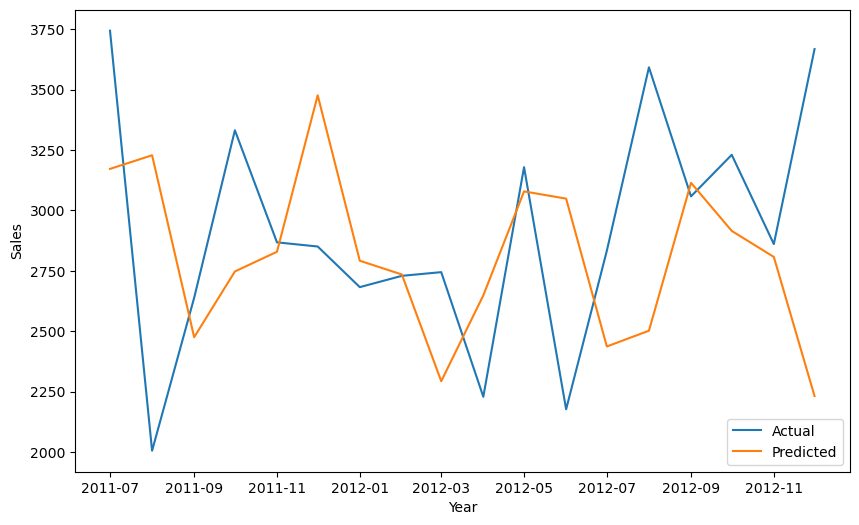

In [193]:
# Plot the actual and predicted sales for the test set
plt.figure(figsize=(10,6))
plt.plot(test, label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [194]:
# Forecast the sales for the next 48 months
forecast = model_fit.forecast(48)

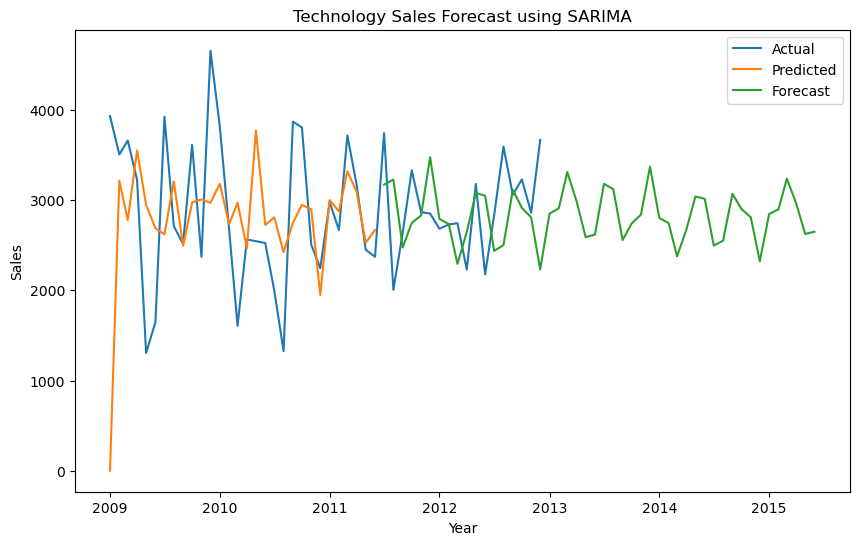

In [195]:
# Plot actual, predicted, and forecasted sales data
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(model_fit.predict(), label='Predicted')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Technology Sales Forecast using SARIMA')
plt.legend()
plt.show()

In [196]:
# Calculate the root mean squared error (RMSE) for the test set predictions
rmse = np.sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 634.781
